In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
df = pd.read_csv('../Data/indeed-job-listings.csv')

In [97]:
df.head(5)

,body,city,company,country,expired,index_url,job_title,listing_url,location,post_date,state,status_code,summary,views
0,"World Wildlife Fund (WWF), the worldâs leadi...",Washington,World Wildlife Fund,US,False,http://api.indeed.com/ads/apisearch?publisher=...,IN-16092 Conservation Data Analysis Intern,http://www.indeed.com/viewjob?jk=7e8fe74842451...,"Washington, DC US","Mon, 25 Apr 2016 21:36:16 GMT",DC,200,"Data management, including updating database m...",17.0
1,"Job Description\n\nThe Weather Company, an IBM...",Boston,IBM,US,False,http://api.indeed.com/ads/apisearch?publisher=...,Data Science Analyst for The Weather Company,http://www.indeed.com/viewjob?jk=4332542420d6b...,"Boston, MA US","Thu, 03 Mar 2016 04:06:28 GMT",MA,200,"Provide expertise in data acquisition, data qu...",10735.0
2,Job Number: 01203341\n\n\nDescription\n\n\nSo ...,Washington,Booz Allen Hamilton,US,False,http://api.indeed.com/ads/apisearch?publisher=...,Data Scientist,http://www.indeed.com/viewjob?jk=5df3246825de1...,"Washington, DC US","Fri, 15 Apr 2016 07:31:57 GMT",DC,200,Our Data Science team:. Experience in working ...,863.0
3,everis is a multinational consulting firm prov...,Washington,Everis USA,US,False,http://api.indeed.com/ads/apisearch?publisher=...,Healthcare Data Analyst,http://www.indeed.com/viewjob?jk=ba266f8cb3fa7...,"Washington, DC US","Mon, 25 Apr 2016 19:56:40 GMT",DC,200,The Healthcare Data Analyst understands health...,10.0
4,CHASE Professionals is currently representing ...,Duluth,CHASE Professionals,US,False,http://api.indeed.com/ads/apisearch?publisher=...,Sr. Data Scientist,http://www.indeed.com/viewjob?jk=fd9df86861b6e...,"Duluth, GA US","Mon, 25 Apr 2016 14:28:26 GMT",GA,200,Strong understanding of algorithms and advance...,147.0


In [98]:
df.columns

Index(['body', 'city', 'company', 'country', 'expired', 'index_url',
       'job_title', 'listing_url', 'location', 'post_date', 'state',
       'status_code', 'summary', 'views'],
      dtype='object')

In [99]:
df.isna().sum()

body            0
city            0
company         0
country         0
expired         0
index_url       0
job_title       0
listing_url     0
location        0
post_date       0
state           0
status_code     0
summary         0
views          17
dtype: int64

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   body         100 non-null    object 
 1   city         100 non-null    object 
 2   company      100 non-null    object 
 3   country      100 non-null    object 
 4   expired      100 non-null    bool   
 5   index_url    100 non-null    object 
 6   job_title    100 non-null    object 
 7   listing_url  100 non-null    object 
 8   location     100 non-null    object 
 9   post_date    100 non-null    object 
 10  state        100 non-null    object 
 11  status_code  100 non-null    int64  
 12  summary      100 non-null    object 
 13  views        83 non-null     float64
dtypes: bool(1), float64(1), int64(1), object(11)
memory usage: 10.4+ KB


In [101]:
df['views'].value_counts()
df['views'] = df['views'].fillna(0).astype(int)

In [102]:
#missing value with mean 
df['views'] =df['views'].fillna(df['views'].mean())

In [103]:
df.isna().sum()

body           0
city           0
company        0
country        0
expired        0
index_url      0
job_title      0
listing_url    0
location       0
post_date      0
state          0
status_code    0
summary        0
views          0
dtype: int64

In [104]:
df['location'].value_counts()

location
Washington, DC US             23
New York, NY US                7
Arlington, VA US               6
Springfield, VA US             5
McLean, VA US                  4
Alexandria, VA US              3
Austin, TX US                  3
Annapolis Junction, MD US      3
San Jose, CA US                2
Phoenix, AZ US                 2
Philadelphia, PA US            2
Falls Church, VA US            2
Fort George G Meade, MD US     2
Greenbelt, MD US               2
San Antonio, TX US             2
Chicago, IL US                 2
Tampa, FL US                   1
Duluth, GA US                  1
Boston, MA US                  1
Reston, VA US                  1
Fairfax, VA US                 1
College Park, MD US            1
Golden, CO US                  1
Glendale, CA US                1
Kannapolis, NC US              1
San Diego, CA US               1
Columbus, IN US                1
Wilmington, DE US              1
Folsom, CA US                  1
Fort Worth, TX US              1
L

In [105]:
location_with_high_jobs = df['location'].value_counts().head(1).index.values
print(location_with_high_jobs)

['Washington, DC US']


In [106]:
df.columns

Index(['body', 'city', 'company', 'country', 'expired', 'index_url',
       'job_title', 'listing_url', 'location', 'post_date', 'state',
       'status_code', 'summary', 'views'],
      dtype='object')

In [107]:
df['state'].value_counts()

state
VA    24
DC    23
MD    10
CA     9
NY     8
TX     6
GA     3
IL     3
FL     2
PA     2
AZ     2
NC     2
CO     2
MA     1
IN     1
DE     1
WA     1
Name: count, dtype: int64

In [108]:
df['company'].value_counts()

company
Booz Allen Hamilton                               5
U.S. Federal Government                           3
KPMG                                              3
National Security Agency                          2
World Wildlife Fund                               2
                                                 ..
State Farm Mutual Automobile Insurance Company    1
CSC                                               1
Qphase Technologies                               1
Hobsons                                           1
Department Of Veterans Affairs                    1
Name: count, Length: 77, dtype: int64

In [109]:
company_who_posted_most_jobs = df['company'].mode()[0]
print(company_who_posted_most_jobs)

Booz Allen Hamilton


In [110]:
company_who_posted_most_jobs = df['company'].value_counts().idxmax()
print(company_who_posted_most_jobs)

Booz Allen Hamilton


In [111]:
df['job_title'].value_counts()

job_title
Data Scientist                                                     31
Data Science Intern                                                 6
Data Analyst                                                        5
Data Analyst - Data Science Office                                  2
Science Education Administrator (Program Director)                  2
Associate All-Source Geospatial Data Scientist                      2
IN-16093 Conservation Data Visualization Intern                     1
Sr. Data Scientist                                                  1
Data Science Analyst for The Weather Company                        1
IN-16092 Conservation Data Analysis Intern                          1
Statistical Data Analyst                                            1
Data Science Summer Intern                                          1
Data Scientist/Analyst                                              1
Data Scientist - Entry Level                                        1
Applied Ma

In [112]:
def standardize_job_title(title):
    title = str(title).lower().strip()
    
    if 'data scientist' in title:
        return 'Data Scientist'
    elif 'data analyst' in title:
        return 'Data Analyst'
    elif 'intern' in title and 'data' in title:
        return 'Data Science Intern'
    elif 'machine learning' in title:
        return 'Machine Learning Engineer'
    elif 'manager' in title and ('analytics' in title or 'data' in title):
        return 'Analytics Manager'
    elif 'engineer' in title and 'data' in title:
        return 'Data Engineer'
    else:
        return 'Other'

df['job_title_standardized'] = df['job_title'].apply(standardize_job_title)
df['job_title_standardized'].value_counts()

job_title_standardized
Data Scientist               48
Other                        20
Data Science Intern          11
Data Analyst                 10
Analytics Manager             5
Data Engineer                 4
Machine Learning Engineer     2
Name: count, dtype: int64

In [113]:
df.head(5)

,body,city,company,country,expired,index_url,job_title,listing_url,location,post_date,state,status_code,summary,views,job_title_standardized
0,"World Wildlife Fund (WWF), the worldâs leadi...",Washington,World Wildlife Fund,US,False,http://api.indeed.com/ads/apisearch?publisher=...,IN-16092 Conservation Data Analysis Intern,http://www.indeed.com/viewjob?jk=7e8fe74842451...,"Washington, DC US","Mon, 25 Apr 2016 21:36:16 GMT",DC,200,"Data management, including updating database m...",17,Data Science Intern
1,"Job Description\n\nThe Weather Company, an IBM...",Boston,IBM,US,False,http://api.indeed.com/ads/apisearch?publisher=...,Data Science Analyst for The Weather Company,http://www.indeed.com/viewjob?jk=4332542420d6b...,"Boston, MA US","Thu, 03 Mar 2016 04:06:28 GMT",MA,200,"Provide expertise in data acquisition, data qu...",10735,Other
2,Job Number: 01203341\n\n\nDescription\n\n\nSo ...,Washington,Booz Allen Hamilton,US,False,http://api.indeed.com/ads/apisearch?publisher=...,Data Scientist,http://www.indeed.com/viewjob?jk=5df3246825de1...,"Washington, DC US","Fri, 15 Apr 2016 07:31:57 GMT",DC,200,Our Data Science team:. Experience in working ...,863,Data Scientist
3,everis is a multinational consulting firm prov...,Washington,Everis USA,US,False,http://api.indeed.com/ads/apisearch?publisher=...,Healthcare Data Analyst,http://www.indeed.com/viewjob?jk=ba266f8cb3fa7...,"Washington, DC US","Mon, 25 Apr 2016 19:56:40 GMT",DC,200,The Healthcare Data Analyst understands health...,10,Data Analyst
4,CHASE Professionals is currently representing ...,Duluth,CHASE Professionals,US,False,http://api.indeed.com/ads/apisearch?publisher=...,Sr. Data Scientist,http://www.indeed.com/viewjob?jk=fd9df86861b6e...,"Duluth, GA US","Mon, 25 Apr 2016 14:28:26 GMT",GA,200,Strong understanding of algorithms and advance...,147,Data Scientist


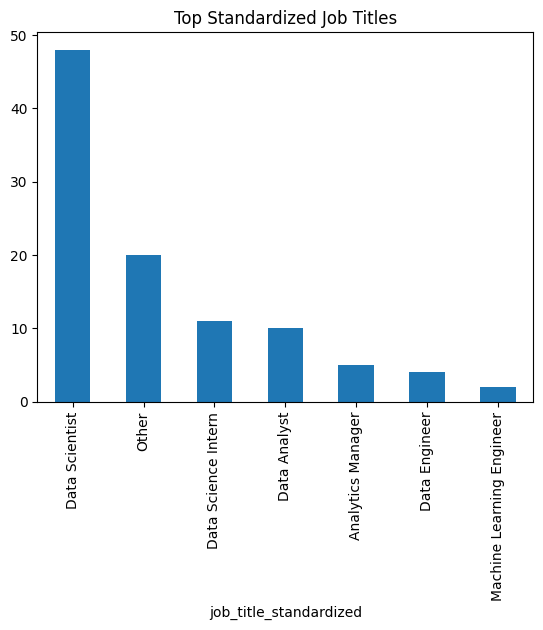

In [114]:
df["job_title_standardized"].value_counts().head(10).plot(kind="bar", title="Top Standardized Job Titles")
plt.show()

In [115]:
df['expired'] = df['expired'].map({True:0, False:1})

<Axes: title={'center': 'Top Hiring Locations'}, xlabel='location'>

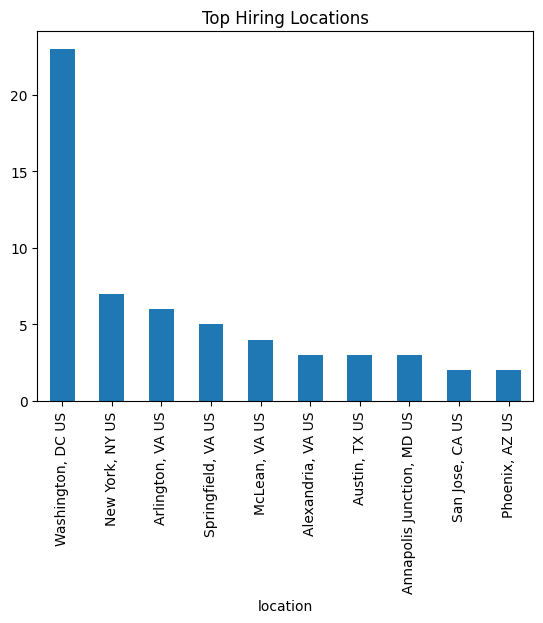

In [116]:
df["location"].value_counts().head(10).plot(kind="bar", title="Top Hiring Locations")

In [117]:
df.drop(columns=['job_title','index_url','listing_url','expired'], inplace=True)

In [118]:
df.columns

Index(['body', 'city', 'company', 'country', 'location', 'post_date', 'state',
       'status_code', 'summary', 'views', 'job_title_standardized'],
      dtype='object')

In [119]:
df.head()

,body,city,company,country,location,post_date,state,status_code,summary,views,job_title_standardized
0,"World Wildlife Fund (WWF), the worldâs leadi...",Washington,World Wildlife Fund,US,"Washington, DC US","Mon, 25 Apr 2016 21:36:16 GMT",DC,200,"Data management, including updating database m...",17,Data Science Intern
1,"Job Description\n\nThe Weather Company, an IBM...",Boston,IBM,US,"Boston, MA US","Thu, 03 Mar 2016 04:06:28 GMT",MA,200,"Provide expertise in data acquisition, data qu...",10735,Other
2,Job Number: 01203341\n\n\nDescription\n\n\nSo ...,Washington,Booz Allen Hamilton,US,"Washington, DC US","Fri, 15 Apr 2016 07:31:57 GMT",DC,200,Our Data Science team:. Experience in working ...,863,Data Scientist
3,everis is a multinational consulting firm prov...,Washington,Everis USA,US,"Washington, DC US","Mon, 25 Apr 2016 19:56:40 GMT",DC,200,The Healthcare Data Analyst understands health...,10,Data Analyst
4,CHASE Professionals is currently representing ...,Duluth,CHASE Professionals,US,"Duluth, GA US","Mon, 25 Apr 2016 14:28:26 GMT",GA,200,Strong understanding of algorithms and advance...,147,Data Scientist


In [120]:
#clean the date columns
df['post_date'] = pd.to_datetime(df['post_date'], format='%a, %d %b %Y %H:%M:%S %Z', errors='coerce')
df['post_date'].head(5)

0   2016-04-25 21:36:16+00:00
1   2016-03-03 04:06:28+00:00
2   2016-04-15 07:31:57+00:00
3   2016-04-25 19:56:40+00:00
4   2016-04-25 14:28:26+00:00
Name: post_date, dtype: datetime64[ns, UTC]

In [121]:
# # Extract date components
# df['post_year'] = df['post_date'].dt.year
# df['post_month'] = df['post_date'].dt.month
# df['post_day'] = df['post_date'].dt.day
# df['post_weekday'] = df['post_date'].dt.day_name()

# Convert to just date (remove time)
df['post_date_only'] = df['post_date'].dt.date

In [122]:
df['post_date_only']

0     2016-04-25
1     2016-03-03
2     2016-04-15
3     2016-04-25
4     2016-04-25
         ...    
95    2016-04-14
96    2016-04-09
97    2016-03-21
98    2016-03-16
99    2016-04-27
Name: post_date_only, Length: 100, dtype: object